### plot_simulator_inputs

This notebook gives visualizations of some of the inputs to the simulator.

In [1]:
# hack to get the path right
import sys
sys.path.append('..')

In [12]:
import ztf_sim
from astropy.time import Time
import pandas as pd
import numpy as np
import astropy.units as u
import pylab as plt
import seaborn as sns
%matplotlib inline

In [107]:
sns.set_style('ticks')
sns.set_context('talk')

### weather

We have binned PTF observing into 20 minute intervals to use as a proxy for weather, daylight, and other downtime.

In [111]:
df = ztf_sim.utils.df_read_from_sqlite('weather_blocks')

In [112]:
df.head()

,year,block,nexps
0,2009,1089,9
1,2009,1090,11
2,2009,1091,3
3,2009,1092,6
4,2009,1095,2


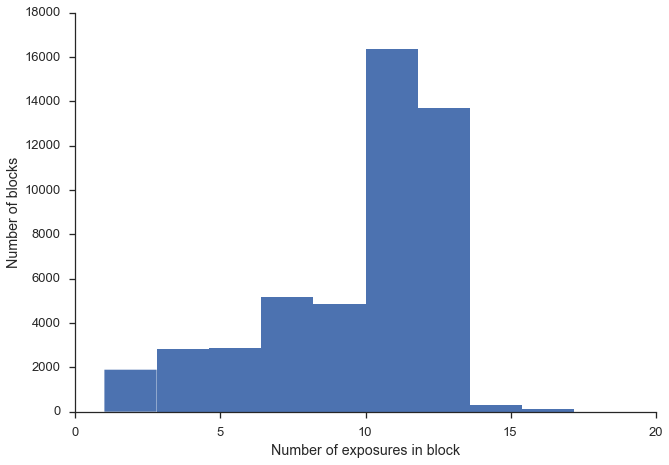

In [113]:
plt.hist(df['nexps'])
plt.xlabel('Number of exposures in block')
plt.ylabel('Number of blocks')
sns.despine()

We see a peak near 12 images per block, which at ~100 seconds average time per exposure matches our 20 minute block size:

In [10]:
12*100*u.second.to(u.min)

20.0

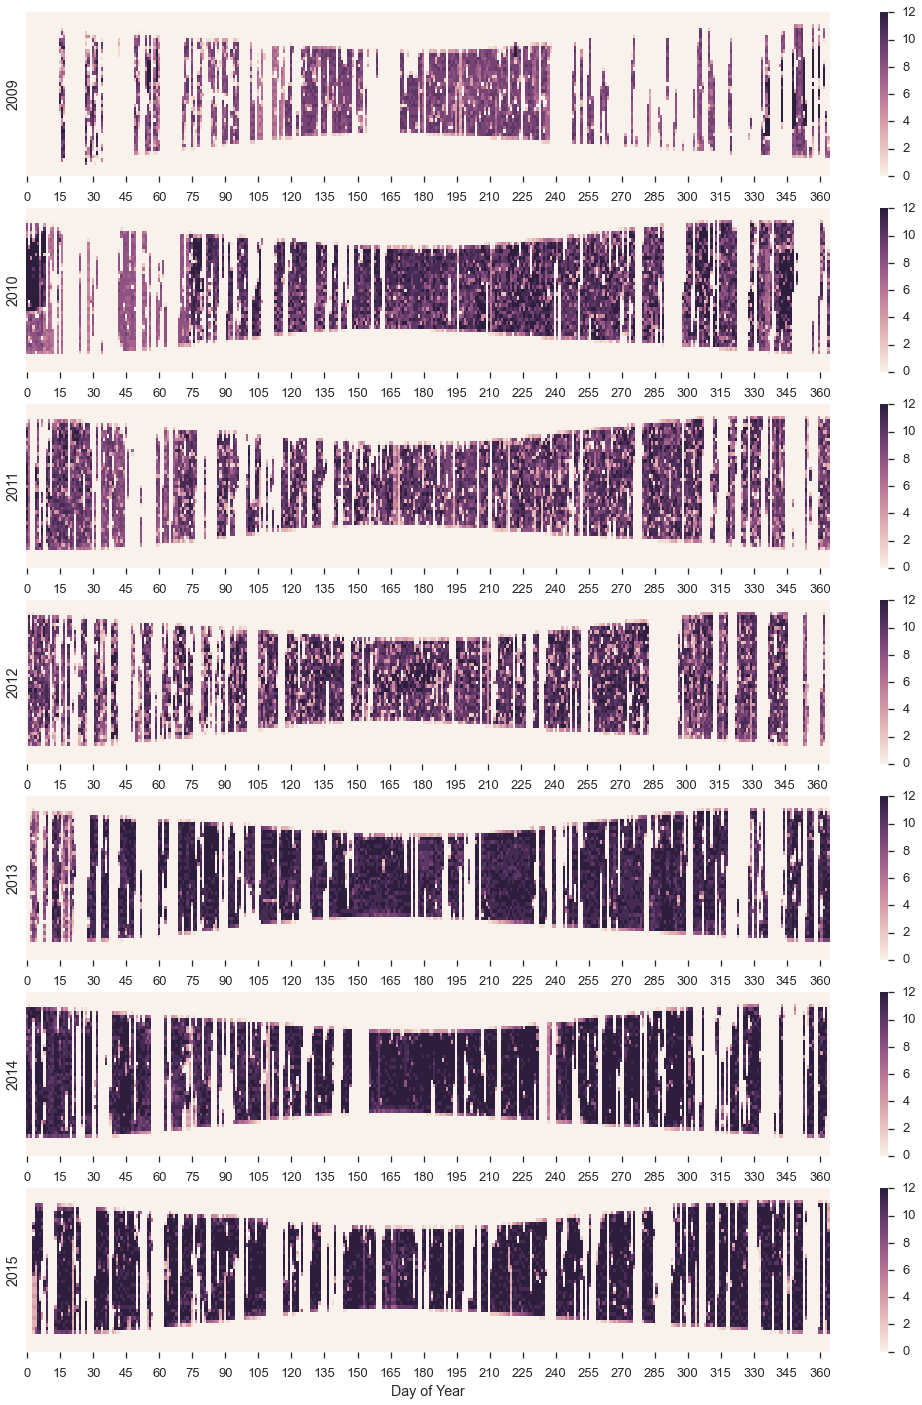

In [153]:
blocks_per_day = np.round((1.*u.day).to(u.min)/ztf_sim.constants.TIME_BLOCK_SIZE).astype(np.int)
fig = plt.figure(figsize=(18,24))
# cut off 2016, which is partial
df = df[df['year'] < 2016]
years = np.sort(list(set(df['year'])))
nyears = len(years)
for i, year in enumerate(years):
    ax = plt.subplot(nyears,1,i+1)
    w = df['year'] == year
    # make an array to hold these, including zeros for times without observations

    # buggy but sufficient accounting for leap years
    ndays = 365
    if year % 4 == 0:
        ndays += 1
    nexps = np.zeros([ndays,blocks_per_day])
    for block, n in zip(df[w]['block'],df[w]['nexps']):
        nexps.flat[block] = n
    sns.heatmap(nexps.T,xticklabels=15,yticklabels=False,vmin=0,vmax=12)
    ax.set_ylim([25,70]) # this was guess and check...
    ax.set_ylabel(np.int(year))
ax.set_xlabel('Day of Year')
plt.savefig('fig/PTF_exposure_blocks.png',bbox_inches='tight')